# Machine Learning - basics of model selection

## What is Machine Learning?

According to wikipedia, machine learning is a field evolved out of **pattern recognition** and **Computational Learning Theory**  
We as data scientists are especially interested in the **former** function. 

### Things we will learn in this lesson
1. Training/Test split
2. Methods of Cross validating and why cross-validation as opposed to conventional validation
3. Importance of data visualization and pre-analysis of data
4. Model Selection Process


In [3]:
# Packages used is ggvis (for visualization) and
# caret (for creating partitions
# class (for using KNN, as we will see later)
# Important to specify the repos parameter on Jupyter notebook

install.packages("ggvis", repos = 'http://cran.us.r-project.org')
install.packages("caret", repos = 'http://cran.us.r-project.org')
install.packages("class", repos = 'http://cran.us.r-project.org')

Installing package into 'C:/Users/Dae Won Kim/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'ggvis' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dae Won Kim\AppData\Local\Temp\RtmpWGejTy\downloaded_packages


Installing package into 'C:/Users/Dae Won Kim/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dae Won Kim\AppData\Local\Temp\RtmpWGejTy\downloaded_packages


Installing package into 'C:/Users/Dae Won Kim/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'class' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dae Won Kim\AppData\Local\Temp\RtmpWGejTy\downloaded_packages


In [4]:
# Good coding practice to use library instead of require

library(ggvis)
library(caret)
library(class)

Loading required package: lattice
Loading required package: ggplot2

Attaching package: 'ggplot2'

The following object is masked from 'package:ggvis':

    resolution



  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

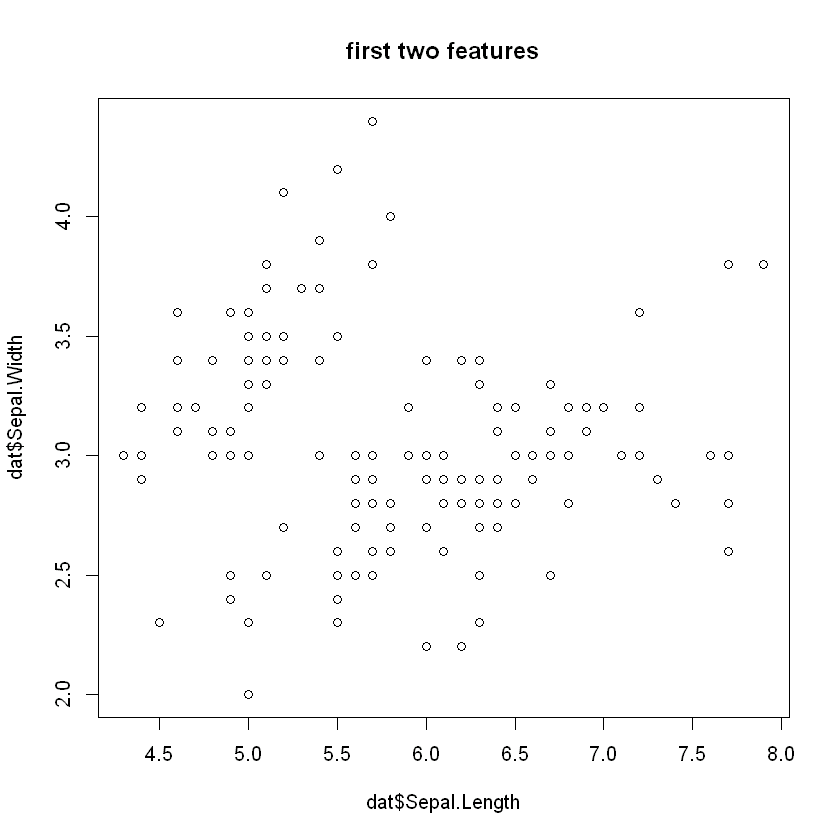

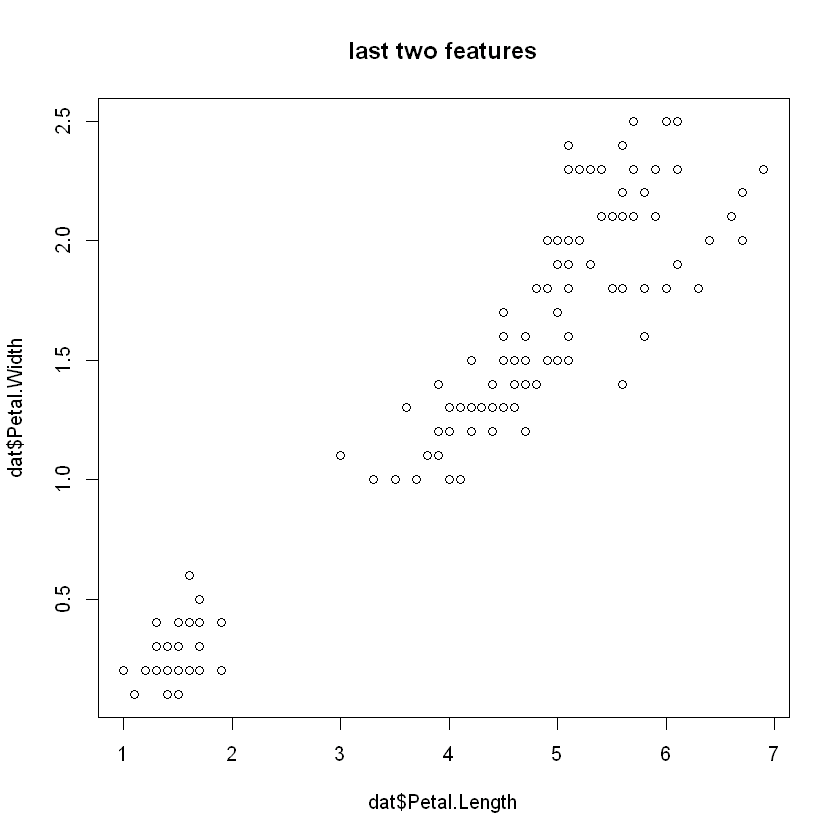

In [5]:
# let's see what the data is like before we do any sort of machine learning!
dat <- iris

summary(dat)
plot(dat$Sepal.Length, dat$Sepal.Width, main = "first two features")
plot(dat$Petal.Length, dat$Petal.Width, main = "last two features")

### **Notable features**
1. Each species represents 1/3 of the data
2. There is two separate clusters
3. The first two features are related, and the same for third and fourth features

### Our goal: predict the species.
so let's look at how the species distribution is made by using ggvis!

In [6]:
# Plot the data using ggvis
first_plot <- ggvis(iris, x= ~Sepal.Length, y = ~Sepal.Width, fill = ~Species)
layer_points(first_plot)

second_plot <- ggvis(iris, x = ~Petal.Length, ~Petal.Width, fill = ~Species)
layer_points(second_plot)

### **New observations**
1. Setosa is clearly separable from the other two
2. The rest is not cleanly separated

## **So now let's dive into actual machine learning!**

### Step 1 : Divide data into training and test                         -  **why? and where do we divide?**
### Step 2 : Check if both train and test is a good sample    -  ** why?**
### Step 3 : Validate your training model                                 -  **why?, why not conventional validation?**
    1. exhasutive cross validation
    2. non-exhaustive cross validation
### Step 4 : Select parameter value that is most robust         - **why?**
### Step 5 : Train your learner and produce results.
### Step 6 : Select model that best fits your assumptions, *NOT ALWAYS WHAT IS MOST ACCURATE*


In [7]:
# Step 1: divide the data into training and test set by randomly choosing 20% of the data as test (why 20? or why not 20?)
ind   <- sample(nrow(dat), (nrow(dat)*0.2))
train <- dat[-ind,]
test  <- dat[ind,]

# Step 2: visualize to check if good representation
layer_points(ggvis(train, x= ~Sepal.Length, y = ~Sepal.Width, fill = ~Species))
layer_points(ggvis(test, x = ~Sepal.Length, y = ~Sepal.Width, fill = ~Species))

In [9]:
#Step 3 Validate your data

# Non-Exhaustive 10-fold cross validation 
kfoldknn <- function(x){
  partition  <- createFolds(c(1:nrow(train)), k = 10)  # createFolds is a caret package function that creates partitions!
  prediction <- vector(mode="character",length= nrow(train))
  accuracy   <- vector(length = 10)
    
  for(i in 1:10){
    val_set                <- train[partition[[i]],]
    val_train              <- train[-partition[[i]],]
    prediction[partition[[i]]] <- as.character(knn(train = val_train[,1:4], test = val_set[,1:4], cl= val_train[,5], k = x))
    accuracy[i]            <- mean(prediction[partition[[i]]]==val_set[,5])     # R conveniently evaluates booleans as if numeric
  }
  return(mean(accuracy))
}

# Built-in function for leave-one-out cross-validation.
acc <- vector(length = (nrow(train)-1))
for( i in 1:(nrow(train)-1)){
  acc[i] <- mean(train[,5]== knn.cv(train = train[,1:4], cl = train[,5], k=i ))
}

Warning message:
In knn(train = val_train[, 1:4], test = val_set[, 1:4], cl = val_train[, : k = 109 exceeds number 108 of patternsWarning message:
In knn(train = val_train[, 1:4], test = val_set[, 1:4], cl = val_train[, : k = 109 exceeds number 108 of patternsWarning message:
In knn(train = val_train[, 1:4], test = val_set[, 1:4], cl = val_train[, : k = 109 exceeds number 108 of patternsWarning message:
In knn(train = val_train[, 1:4], test = val_set[, 1:4], cl = val_train[, : k = 109 exceeds number 108 of patternsWarning message:
In knn(train = val_train[, 1:4], test = val_set[, 1:4], cl = val_train[, : k = 109 exceeds number 108 of patternsWarning message:
In knn(train = val_train[, 1:4], test = val_set[, 1:4], cl = val_train[, : k = 109 exceeds number 108 of patternsWarning message:
In knn(train = val_train[, 1:4], test = val_set[, 1:4], cl = val_train[, : k = 109 exceeds number 108 of patternsWarning message:
In knn(train = val_train[, 1:4], test = val_set[, 1:4], cl = val_train[, 

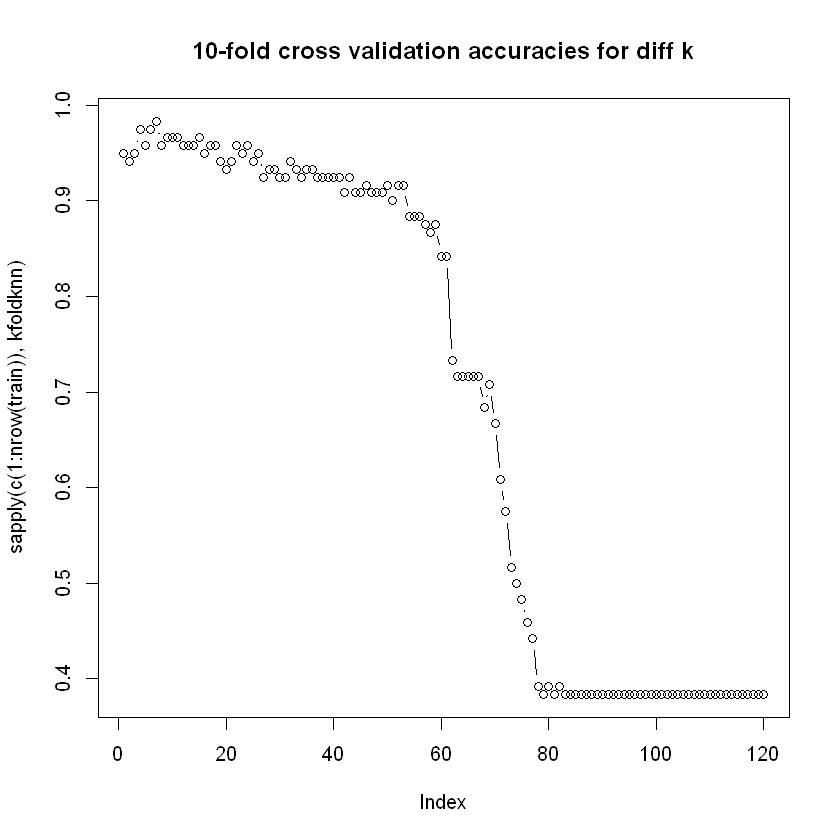

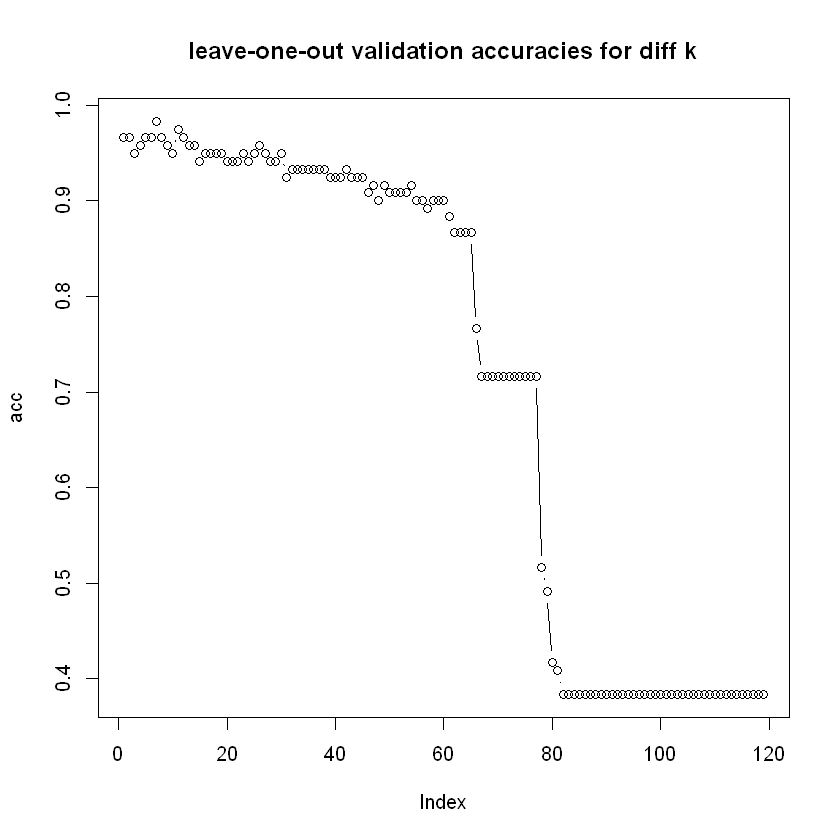

In [19]:
#Step 4 Select parameter value that is most robust ( by first plotting validation accuracies over different parameters)
plot(sapply(c(1:nrow(train)), kfoldknn), type ='b', main = "10-fold cross validation accuracies for diff k")
plot(acc,type= 'b', main = "leave-one-out validation accuracies for diff k")

# doesn't work for jupiter that well so will show on RSTUDIO!


### Why does the plot look like this??

[1] 0.9

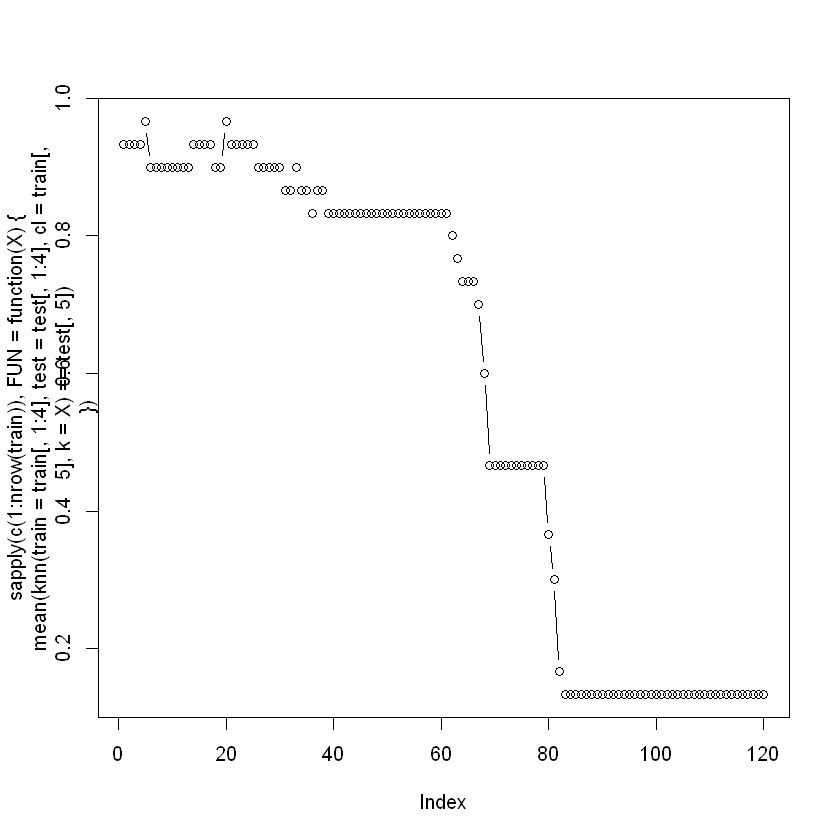

In [20]:
mean(knn(train = train[,1:4], test = test[,1:4], cl = train[,5], k = 10)==test[,5])

plot(sapply(c(1:nrow(train)), FUN = function(X){
mean(knn(train = train[,1:4], test = test[,1:4], cl = train[,5], k = X) == test[,5])}), type = 'b')